In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.chebyshev import *
from fancyimpute import KNN
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
macro = pd.read_csv('../../data/macro.csv')
indices = pd.read_csv('../data/district_indices.csv')
moscow = pd.read_csv('../data/moscow_index.csv',header=None,parse_dates=[0])
locales = pd.read_csv('../data/okurg_chase.csv')
train = pd.read_csv('../data/clean_train_all_cols_chase.csv',parse_dates=['timestamp'],index_col='id')
test = pd.read_csv('../data/clean_test_all_cols_chase.csv',parse_dates=['timestamp'],index_col='id')

In [3]:
moscow.columns = ['date','price_sqm']
moscow = moscow[moscow.date>'2010-10-01']
moscow['month_year'] = pd.PeriodIndex(moscow['date'], freq='M').strftime('%m/%y')

moscow = moscow.groupby('month_year').price_sqm.median().to_frame()
moscow.reset_index(drop=False,inplace=True)
moscow['date'] = pd.to_datetime(moscow.month_year,format="%m/%y")
moscow.sort_values('date',inplace=True)

In [4]:
moscow.set_index('date',inplace=True)

In [5]:
df = train[['price_doc','full_sq','kremlin_km','sub_area','timestamp']].copy()

In [6]:
df = pd.merge(df,locales[['sub_area','okurg_district']],
              how="left", on="sub_area").reset_index(drop=True).set_index(df.index)

In [7]:
df['price_full_sq'] = df.price_doc / df.full_sq
df['month_year'] = pd.PeriodIndex(df['timestamp'], freq='M').strftime('%m/%y')
macro['month_year'] = pd.PeriodIndex(macro['timestamp'], freq='M').strftime('%m/%y')

In [8]:
def sorted_df(df):
    """ sort by month year index"""
    df['date'] = pd.to_datetime(df.index.tolist(),format='%m/%y')
    df.sort_values('date',inplace=True)
    df.drop('date',axis=1,inplace=True)
    return df

In [9]:
dfg = df.groupby('month_year').price_full_sq
# dfg['date'] = pd.to_datetime(dfg.index.tolist(),format="%m/%y")
multiples_median = sorted_df(dfg.median().to_frame())
multiples_mean = sorted_df(dfg.mean().to_frame())
multiples_count = sorted_df(dfg.count().to_frame())
# multiples_mean = dfg.median()
# sorted_df(multiples_mean.to_frame())

In [10]:
moscow.reset_index(drop=True,inplace=True)

In [11]:
moscow.set_index('month_year',inplace=True)

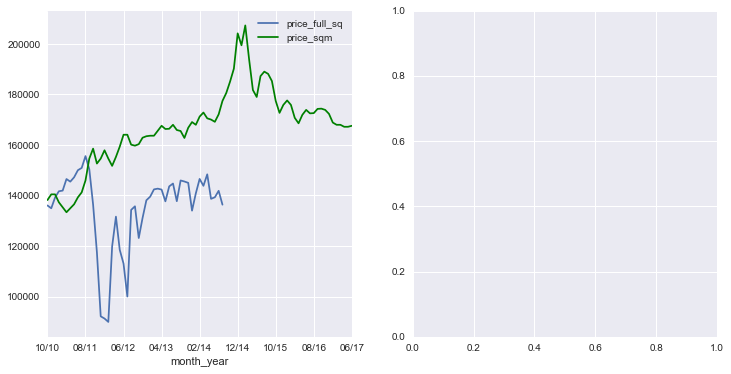

In [12]:
fig, axs = plt.subplots(ncols = 2, figsize=(12,6))
multiples_median.plot.line(ax=axs[0])
moscow.plot.line(style='g',ax=axs[0])

# df[~df.build_year.isnull()].price_full.hist(ax=axs[1])
# multiples_median.plot.line()

In [13]:
good = df[(df.timestamp>'2012-12-31')]

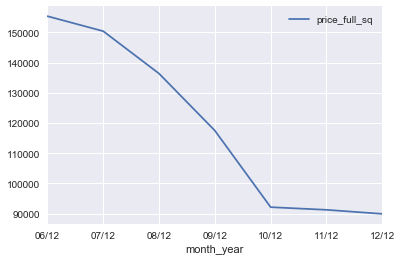

In [14]:
weird = df[(df.timestamp>'2012-06-01') & (df.timestamp<'2012-12-31')]
weird_grouped = sorted_df(weird.groupby('month_year').price_full_sq.median().to_frame())
weird_grouped.plot.line()

district
central         Axes(0.125,0.125;0.775x0.755)
eastern         Axes(0.125,0.125;0.775x0.755)
northeastern    Axes(0.125,0.125;0.775x0.755)
northern        Axes(0.125,0.125;0.775x0.755)
northwestern    Axes(0.125,0.125;0.775x0.755)
outside         Axes(0.125,0.125;0.775x0.755)
southeastern    Axes(0.125,0.125;0.775x0.755)
southern        Axes(0.125,0.125;0.775x0.755)
southwestern    Axes(0.125,0.125;0.775x0.755)
western         Axes(0.125,0.125;0.775x0.755)
zelenograd      Axes(0.125,0.125;0.775x0.755)
dtype: object

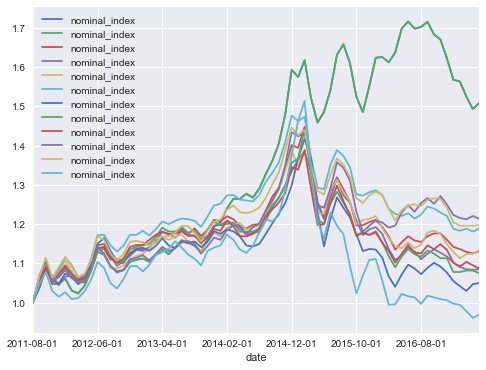

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

indices.groupby('district').plot.line(x='date',y='nominal_index',ax=ax)

In [16]:
good_counts = good.sub_area.value_counts(normalize=True).to_frame()
good_counts.reset_index(inplace=True)
good_counts.columns = ['sub_area','percent']
good_multiples = good.groupby('sub_area').price_full_sq.median().to_frame().reset_index()

In [17]:
weird_counts = weird.sub_area.value_counts(normalize=True).to_frame()
weird_counts.reset_index(inplace=True)
weird_counts.columns = ['sub_area','percent']
weird_multiples = weird.groupby('sub_area').price_full_sq.median().to_frame().reset_index()

temp = pd.merge(weird_counts,weird_multiples,on='sub_area')
temp = temp.merge(good_counts,on='sub_area',suffixes=('_weird','_good'))
temp = temp.merge(good_multiples,on='sub_area',suffixes=('_weird','_good'))
temp

,sub_area,percent_weird,price_full_sq_weird,percent_good,price_full_sq_good
0,Poselenie Sosenskoe,0.109680,82967.763158,0.059582,95592.875000
1,Poselenie Voskresenskoe,0.074661,85798.804825,0.018734,99606.530612
2,Poselenie Vnukovskoe,0.053518,83137.137255,0.050194,116293.276923
3,Nekrasovka,0.039643,90256.034483,0.060375,101850.000000
4,Poselenie Moskovskij,0.039643,87157.112500,0.033421,95031.122807
5,Tverskoe,0.029402,81794.444444,0.023407,105000.000000
6,Mitino,0.024447,135487.399924,0.023491,154504.438596
7,Zapadnoe Degunino,0.019491,88502.000000,0.013477,96431.290323
8,Poselenie Desjonovskoe,0.015857,80622.805387,0.012809,92530.947368
9,Poselenie Shherbinka,0.015857,72502.487857,0.016105,84275.054054


In [18]:
macro_grouped = macro.groupby('month_year').mean()
macro_grouped['date'] = pd.to_datetime(macro_grouped.index.tolist(),format="%m/%y")
macro_grouped.sort_values('date',inplace=True)
macro_grouped.drop('date',axis=1,inplace=True)

In [19]:
macro_month_imputed = pd.DataFrame(KNN(k=2).complete(macro_grouped))
macro_month_imputed.columns = macro_grouped.columns

Imputing row 1/82 with 28 missing, elapsed time: 0.006


In [20]:
macro_grouped[macro_grouped.isnull().any(axis=1)]

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
month_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/10,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.838164,42.563157,76.635714,NaN,38807.2,-0.078209,5.000,NaN,1516.350000,1431.888571,130.422381,178.836333,7.484970e+06,NaN,NaN,142968.0,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484000,106.8,6436.244000,0.018000,0.690000,63932.00000,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.30,14.1,13.8,10.70,11.00,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.20,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,1356.112607,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41000,993.0,NaN,NaN,63.03,22825.0,NaN
02/10,72.9700,NaN,NaN,315.1,337.2,NaN,18.114,NaN,30.157571,41.178407,74.726429,NaN,38807.2,-0.078209,5.000,NaN,1410.617143,1347.623214,131.297143,182.361071,7.502586e+06,0.002354,NaN,8016.0,NaN,13.93,8375.8638,NaN,42083.2,0.038,38410.5,NaN,11524.14,2882.4169,251.484000,106.8,6436.244000,0.018000,0.690000,63932.00000,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.30,14.1,13.8,10.70,11.00,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.20,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,1356.112607,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41000,993.0,NaN,NaN,63.03,22825.0,NaN
03/10,77.0300,NaN,NaN,317.7,343.9,NaN,16.704,NaN,29.549923,40.109948,79.849032,NaN,38807.2,-0.078209,5.000,NaN,1518.861935,1412.161613,133.769032,184.232903,7.671661e+06,0.022536,NaN,23154.0,NaN,13.64,8375.8638,NaN,40617.7,0.038,38410.5,NaN,11577.71,2882.4169,251.484000,106.8,6436.244000,0.018000,0.690000,63932.00000,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.30,14.1,13.8,10.70,11.00,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.20,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,1356.112607,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41000,993.0,NaN,NaN,63.03,22825.0,NaN
04/10,82.8700,9995.8,4.1,319.8,350.2,NaN,16.604,14.1,29.183473,39.184667,85.633333,NaN,38807.2,-0.078209,4.000,NaN,1619.000667,1480.396000,134.67700

In [21]:
macro_month_imputed.head()

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,76.10,9995.800163,4.1,315.81356,339.038779,86.721003,17.727035,14.100000,29.838164,42.563157,76.635714,-0.027616,38807.2,-0.078209,5.0,6.02,1516.350000,1431.888571,130.422381,178.836333,7484970.0,0.007892,4.447922,142968.0,1.515150,13.72,8375.8638,0.187791,30789.2,0.038,38410.5,0.168917,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,147.422096,80.610879,59.621083,46.252930,41.320781,34.836742,28.142132,721.477765,1356.112607,89.049503,18.0,99.4,7872.848285,162.9,846.000028,302.000010,741.000025,690.0,6221.0,527.0,0.41,993.0,269768.009060,22.370001,63.03,22825.0,230310.007735
1,72.97,9995.800523,4.1,315.10000,337.200000,86.721003,18.114000,14.100001,30.157571,41.178407,74.726429,-0.027806,38807.2,-0.078209,5.0,6.02,1410.617143,1347.623214,131.297143,182.361071,7502586.0,0.002354,4.447471,8016.0,1.514845,13.93,8375.8638,0.187791,42083.2,0.038,38410.5,0.168917,11524.14,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,147.433612,80.605982,59.621133,46.251882,41.320045,34.836386,28.141408,721.477765,1356.112607,89.049503,18.0,99.4,7872.848285,162.9,846.000027,302.000009,741.000023,690.0,6221.0,527.0,0.41,993.0,269768.008470,22.370001,63.03,22825.0,230310.007231
2,77.03,9995.800227,4.1,317.70000,343.900000,86.721005,16.704000,14.100000,29.549923,40.109948,79.849032,-0.028558,38807.2,-0.078209,5.0,6.02,1518.861935,1412.161613,133.769032,184.232903,7671661.0,0.022536,4.447276,23154.0,1.514712,13.64,8375.8638,0.187791,40617.7,0.038,38410.5,0.168917,11577.71,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,147.611746,80.530230,59.621909,46.235681,41.308669,34.830870,28.130205,721.477765,1356.112607,89.049505,18.0,99.4,7872.848285,162.

In [22]:
X_filled_knn.head(10)

NameError: name 'X_filled_knn' is not defined

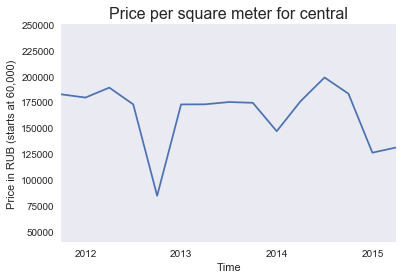

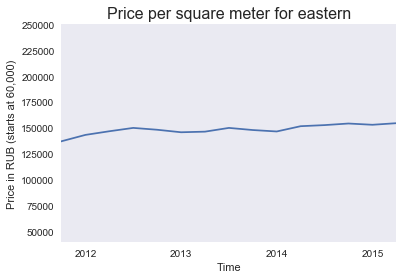

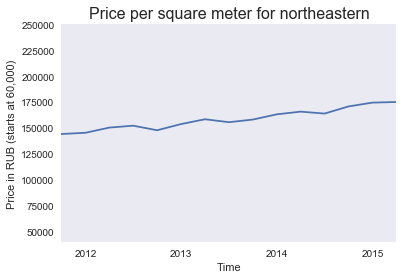

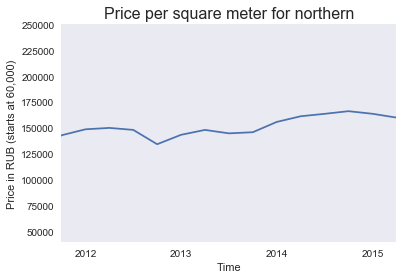

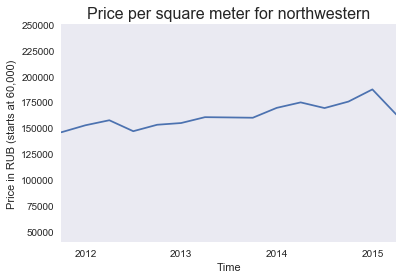

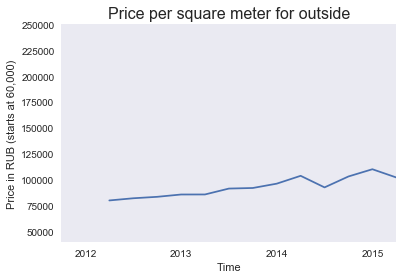

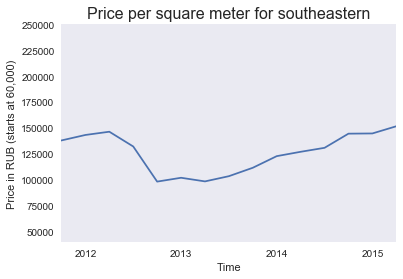

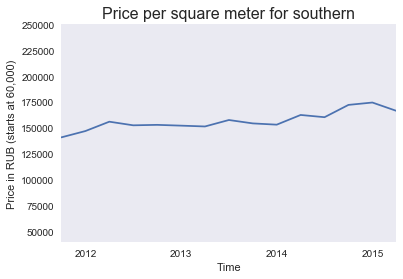

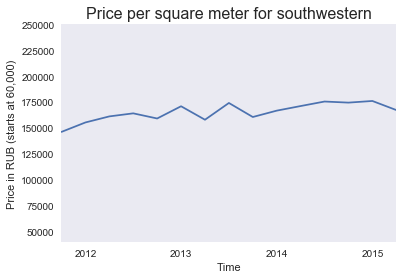

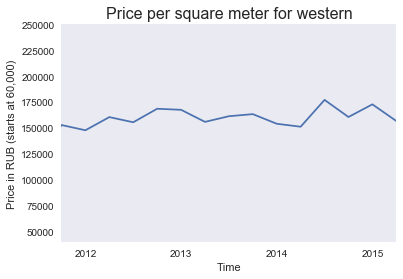

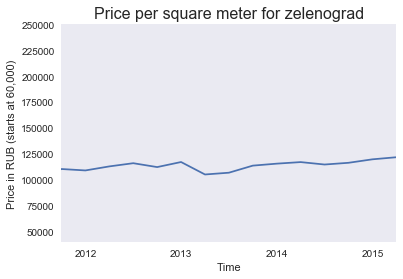

In [124]:
dfg = df.groupby('okurg_district')
for group in dfg:
    time_group = group[1].set_index('timestamp').groupby(pd.TimeGrouper(freq='Q'))
    fig, ax = plt.subplots()
    time_group.price_full_sq.median().plot()
    
#     (time_group['price_doc'].sum() / time_group['full_sq'].sum()).plot()
    plt.title('Price per square meter for {}'.format(group[0]), fontsize=16)
    plt.xlabel('Time')
    plt.ylabel('Price in RUB (starts at 60,000)')
    plt.ylim([40000,250000])
    plt.xlim(['2011-11-01', '2015-06-30'])
    plt.grid()

In [125]:
multiples = df.groupby('okurg_district').price_full_sq.median().sort_values()

In [126]:
df.okurg_district.value_counts()

outside         6541
southeastern    3795
southern        3065
eastern         2746
southwestern    2298
northern        2128
northeastern    2084
western         2049
northwestern    1988
central         1561
zelenograd       841
Name: okurg_district, dtype: int64

In [127]:
multiples

okurg_district
outside          92134.920635
zelenograd      113414.634146
southeastern    123255.813953
eastern         149654.761905
northern        155105.020408
southern        158437.634146
western         160526.315789
northeastern    160639.583719
northwestern    163636.363636
southwestern    166666.666667
central         168224.299065
Name: price_full_sq, dtype: float64

In [23]:
import re
from itertools import compress

macro_columns = macro.columns.tolist()

# return macro_columns that are true in the search
rents_cols = list(compress(macro_columns,
                      [re.search("rent_",x) != None for x in macro_columns]))
rents_cols.append('timestamp')
rents = macro[rents_cols].copy()

rents['month_year'] = pd.PeriodIndex(rents.timestamp, freq='M').strftime('%m/%y')

In [129]:
rents_grouped = rents.groupby('month_year').aggregate(np.nanmedian)
rents_grouped.reset_index(inplace=True)
rents_grouped['date'] = pd.to_datetime(rents_grouped.month_year,format="%m/%y")
rents_grouped.sort_values('date', inplace=True)
rents_grouped.reset_index(drop=True,inplace=True)

In [130]:
rents_grouped = rents_grouped[~rents_grouped.isnull().any(axis=1)]

In [131]:
moscow['price_index'] = moscow.price_sqm / moscow.price_sqm[0] * 100.0

In [132]:
moscow.head()

,month_year,price_sqm,price_index
date,,,
2010-10-01,10/10,138182.987552,100.000000
2010-11-01,11/10,140444.813278,101.636834
2010-12-01,12/10,140444.813278,101.636834
2011-01-01,01/11,137297.925311,99.359500
2011-02-01,02/11,135331.120332,97.936166


In [133]:
rents_grouped = pd.merge(rents_grouped,moscow[['month_year','price_index']],on="month_year")
# rents_grouped.drop('date',inplace=True,axis=1)

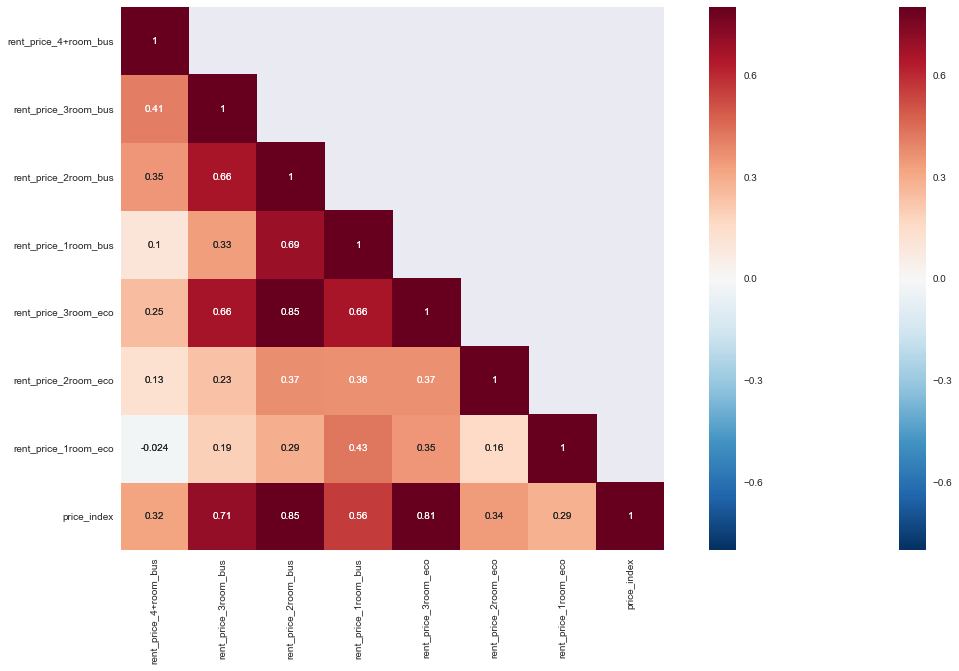

In [134]:
corrMatt = rents_grouped.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [135]:
rents_grouped.set_index('month_year',inplace=True)

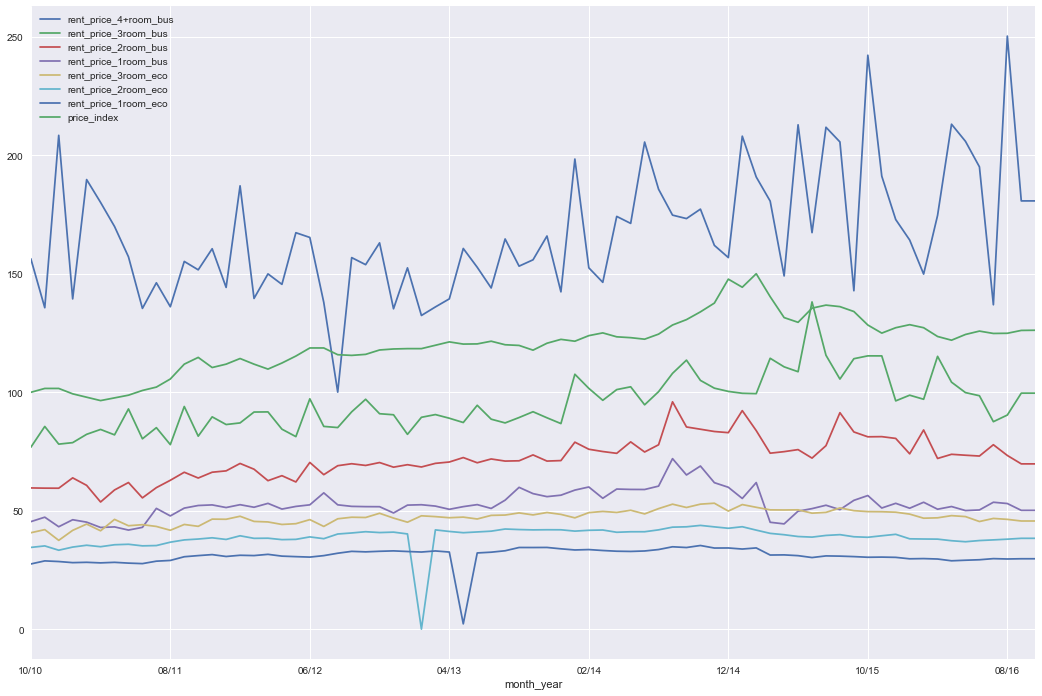

In [136]:


rents_grouped.plot(figsize=(18,12))

In [ ]:
rents.rent

In [143]:
rents_grouped[['rent_price_2room_bus','rent_price_3room_eco','price_index']].plot()

KeyError: "['rent_price_4room_bus'] not in index"

In [138]:
rents_grouped.to_csv('../data/rent_index.csv')

In [139]:
# sns.regplot(x=rents_grouped.index.tolist(),y='rent_price_3room_eco',data=rents_grouped)

In [141]:
temp = rents_grouped.rent_price_4room_bus.to_frame()

AttributeError: 'DataFrame' object has no attribute 'rent_price_4room_bus'

[ 61.95338167  59.89975595  58.71092452  58.19634484  58.19349755
  58.56516992  59.19689919  59.99457136  60.88217093  61.79967738
  62.70110378  63.5526733   64.33112913  65.0221734   65.61903069
  66.12113188  66.53291365  66.86272954  67.1218679   67.32367253
  67.48276148  67.61433967  67.73360092  67.85521492  67.99289487
  68.15904125  68.36445744  68.61813265  68.92708788  69.29628048
  69.72856285  70.22469089  70.78337794  71.40138953  72.07367484
  72.79353023  73.5527906   74.34204403  75.15086548  75.96806496
  76.7819459   77.58056922  78.35201884  79.08466404  79.76741438
  80.38996282  80.94301253  81.41848301  81.80969119  82.11150306
  82.32045138  82.43481515  82.45465642  82.38180995  82.21982148
  81.97383002  81.65038992  81.25722822  80.80293292  80.29656773
  79.74720894  79.16339999  78.55251933  77.92005718  77.26879675
  76.5978956   75.90186265  75.16942648  74.38229051  73.51377069
  72.52731118  71.3748738   69.99519671]


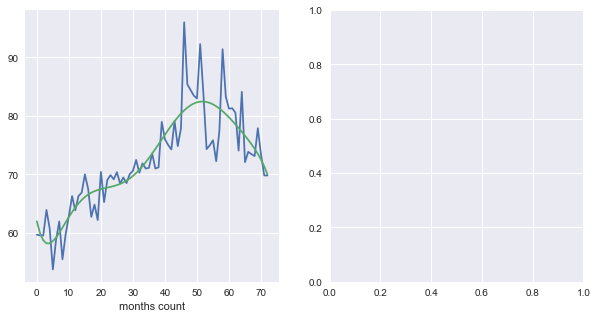

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
y = rents_grouped.rent_price_2room_bus.values
x=np.arange(73)
ch=chebfit(x,y,7)
trendf1=chebval(x,ch)
ax[0].plot(x,y,x,trendf1)
ax[0].set_xlabel('months count')
print trendf1

In [29]:
rents_grouped['room3_smoothed'] = trendf1

In [30]:
rents_grouped['room3_index'] = rents_grouped.room3_smoothed / rents_grouped.room3_smoothed.values[0]

In [31]:
rents_grouped['room3_index'].to_csv('../data/rent_3room_index.csv')

In [32]:
ch=chebfit(x=np.arange(73),y=rents_grouped.rent_price_3room_eco.values,deg=7)
ch

array([  4.03387683e+01,   5.12087648e-01,  -4.81832236e-04,
        -3.88436997e-04,   9.26347722e-06,  -8.22963913e-08,
         2.86532901e-10,  -2.60907628e-13])

,Unnamed: 0,district,month_year,price,date,nominal_index
0,181,central,8/2011,214349.253731,2011-08-01,1.000000
1,198,central,9/2011,225971.855011,2011-09-01,1.054223
2,28,central,10/2011,235573.134328,2011-10-01,1.099015
3,45,central,11/2011,224371.641791,2011-11-01,1.046757
4,62,central,12/2011,224607.462687,2011-12-01,1.047857
5,11,central,1/2012,227437.313433,2012-01-01,1.061060
6,79,central,2/2012,220893.283582,2012-02-01,1.030530
7,96,central,3/2012,219301.492537,2012-03-01,1.023104
8,113,central,4/2012,223546.268657,2012-04-01,1.042907
9,130,central,5/2012,231642.786070,2012-05-01,1.080679


In [45]:
indices_grouped = indices[['district','nominal_index','month_year']].groupby(['district','month_year'])